<a href="https://colab.research.google.com/github/madhusatishg/research-journal-2025/blob/main/projects/Week1/Week1_Day1_IDM_Mastery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# CELL 1: THE DRIVER'S BRAIN IN EQUATIONS
"""
INTELLIGENT DRIVER MODEL (IDM) - THE PSYCHOLOGY:

Think of IDM as modeling a human driver's brain making 2 decisions:

1. "GO FAST" Part: I want to reach my desired speed!
   - If I'm going slow → ACCELERATE!
   - If I'm at desired speed → CRUISE
   - If I'm going too fast → SLOW DOWN

2. "DON'T CRASH" Part: I need to maintain safe distance!
   - If I'm far behind → Relax, plenty of space
   - If I'm getting close → Ease off the gas
   - If I'm too close → BRAKE HARD!

IDM combines these two thoughts mathematically.
"""

print("🧠 Understanding the Driver's Brain Psychology...")
print("✅ Ready to implement the mathematical model!")

🧠 Understanding the Driver's Brain Psychology...
✅ Ready to implement the mathematical model!


In [6]:
# CELL 2: MATHEMATICAL FOUNDATIONS
"""
IDM MATHEMATICAL BREAKDOWN:

Equation 13 from paper:
acceleration = max_accel * [1 - (v/v_desired)^4 - (desired_gap/actual_gap)^2]

Where:
- (v/v_desired)^4 = "GO FAST" urgency (power of 4 makes it aggressive!)
- (desired_gap/actual_gap)^2 = "DON'T CRASH" urgency (squared amplifies danger!)

Equation 14:
desired_gap = min_gap + max(0, time_gap*v + v*(v - v_front)/(2*sqrt(max_accel*comfort_decel)))

Where:
- min_gap = minimum stopping distance
- time_gap*v = safe following time (e.g., 2 seconds)
- the last term = extra space if front car is slower
"""

import math
import numpy as np
import matplotlib.pyplot as plt

print("📐 Mathematical foundations loaded!!!")
print("Ready to code the IDM equations...")

📐 Mathematical foundations loaded!!!
Ready to code the IDM equations...


In [7]:
# CELL 3: BASIC IDM IMPLEMENTATION
def basic_idm(s, v, v_front, v_desired=30,
              time_gap=1.5, min_gap=2.0, max_accel=1.0, comfort_decel=1.5):
    """
    BASIC INTELLIGENT DRIVER MODEL

    Parameters:
    -----------
    s : float - Actual distance to front vehicle (meters)
    v : float - Your current speed (m/s)
    v_front : float - Front vehicle speed (m/s)
    v_desired : float - Your desired speed (m/s)

    Returns:
    --------
    acceleration : float - Acceleration command (m/s²)
                   Positive = Accelerate, Negative = Brake
    """

    print(f"\n🔍 CALCULATION BREAKDOWN:")
    print(f"   Input: distance={s}m, my_speed={v}m/s, front_speed={v_front}m/s")

    # PART A: Calculate desired safe distance
    relative_speed = v - v_front
    extra_space = v * relative_speed / (2 * math.sqrt(max_accel * comfort_decel))
    desired_gap = min_gap + max(0, time_gap * v + extra_space)

    print(f"   Desired safe distance: {desired_gap:.1f}m")
    print(f"   Extra space for safety: {extra_space:.1f}m")

    # PART B: Calculate acceleration decision
    speed_ratio = v / v_desired
    go_fast_urgency = 1 - speed_ratio**4

    gap_ratio = desired_gap / s
    dont_crash_urgency = gap_ratio**2

    acceleration = max_accel * (go_fast_urgency - dont_crash_urgency)

    print(f"   'Go Fast' urgency: {go_fast_urgency:.3f}")
    print(f"   'Don't Crash' urgency: {dont_crash_urgency:.3f}")
    print(f"   Final acceleration: {acceleration:.3f} m/s²")

    return acceleration

print("✅ Basic IDM function implemented with detailed breakdown!")

✅ Basic IDM function implemented with detailed breakdown!


In [9]:
# CELL 4: INTERACTIVE TESTING WITH EXPLANATIONS
print("=== 🧪 INTERACTIVE IDM TESTING ===")
print("Let's test different driving scenarios and see the thinking process!\n")

# Test Scenario 1: Far behind, want to speed up
print("SCENARIO 1: You're 50m behind, both at 20m/s, but you want to go 30m/s")
print("EXPECTATION: Should ACCELERATE (positive acceleration)")
result1 = basic_idm(s=50, v=20, v_front=20, v_desired=30)
print(f"VERDICT: {'🚀 ACCELERATE' if result1 > 0 else '🛑 BRAKE'} ({result1:.2f} m/s²)")

print("\n" + "="*50)

# Test Scenario 2: Too close, need to brake
print("SCENARIO 2: You're only 10m behind at 20m/s (DANGEROUS!)")
print("EXPECTATION: Should BRAKE HARD (negative acceleration)")
result2 = basic_idm(s=10, v=20, v_front=20, v_desired=30)
print(f"VERDICT: {'🚀 ACCELERATE' if result2 > 0 else '🛑 BRAKE'} ({result2:.2f} m/s²)")

print("\n" + "="*50)

# Test Scenario 3: At desired speed
print("SCENARIO 3: You're at your desired speed (30m/s), 40m behind")
print("EXPECTATION: Should MAINTAIN or gentle adjustment")
result3 = basic_idm(s=40, v=30, v_front=30, v_desired=30)
print(f"VERDICT: {'🚀 ACCELERATE' if result3 > 0 else '🛑 BRAKE'} ({result3:.2f} m/s²)")

=== 🧪 INTERACTIVE IDM TESTING ===
Let's test different driving scenarios and see the thinking process!

SCENARIO 1: You're 50m behind, both at 20m/s, but you want to go 30m/s
EXPECTATION: Should ACCELERATE (positive acceleration)

🔍 CALCULATION BREAKDOWN:
   Input: distance=50m, my_speed=20m/s, front_speed=20m/s
   Desired safe distance: 32.0m
   Extra space for safety: 0.0m
   'Go Fast' urgency: 0.802
   'Don't Crash' urgency: 0.410
   Final acceleration: 0.393 m/s²
VERDICT: 🚀 ACCELERATE (0.39 m/s²)

SCENARIO 2: You're only 10m behind at 20m/s (DANGEROUS!)
EXPECTATION: Should BRAKE HARD (negative acceleration)

🔍 CALCULATION BREAKDOWN:
   Input: distance=10m, my_speed=20m/s, front_speed=20m/s
   Desired safe distance: 32.0m
   Extra space for safety: 0.0m
   'Go Fast' urgency: 0.802
   'Don't Crash' urgency: 10.240
   Final acceleration: -9.438 m/s²
VERDICT: 🛑 BRAKE (-9.44 m/s²)

SCENARIO 3: You're at your desired speed (30m/s), 40m behind
EXPECTATION: Should MAINTAIN or gentle adjust

🔄 Running psychology visualization...


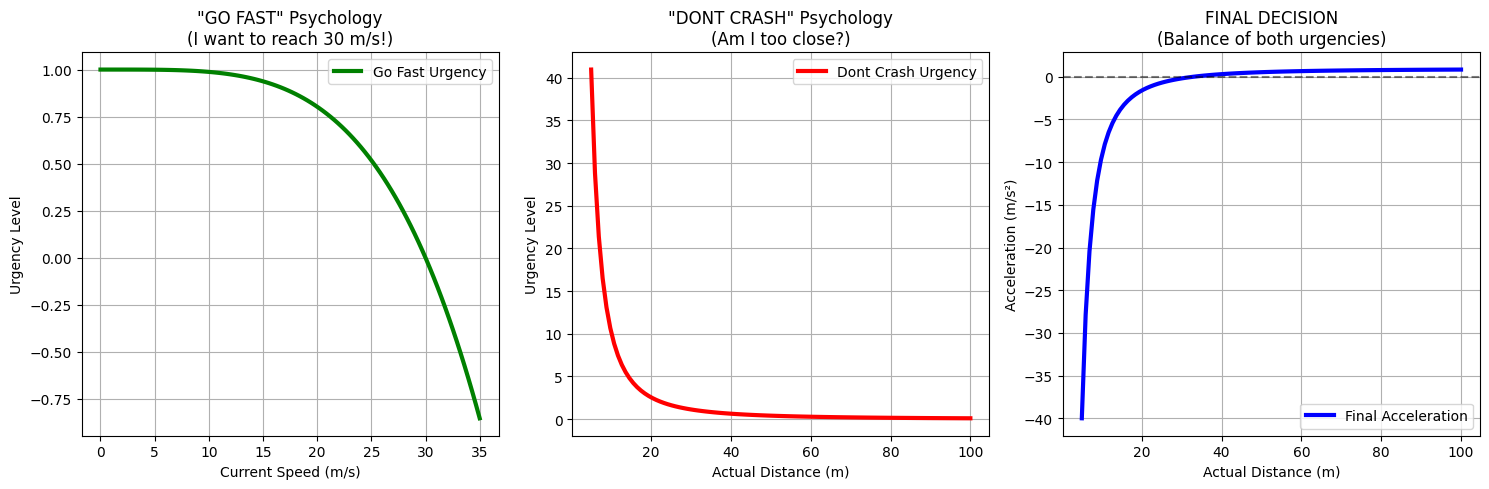

📊 ANALYSIS:
• LEFT: When you're slow, 'Go Fast' urgency is HIGH
• MIDDLE: When you're close, 'Don't Crash' urgency is HIGH
• RIGHT: Final decision balances both urgencies!


In [10]:
# CELL 5: VISUALIZING THE PSYCHOLOGY
"""
VISUALIZING THE DRIVER'S DECISION MAKING:

Let's plot how the 'Go Fast' and 'Don't Crash' urgencies change
with different situations.

This will show us the MATHEMATICAL PSYCHOLOGY behind IDM.
"""

def plot_idm_psychology():
    # Create range of scenarios
    speeds = np.linspace(0, 35, 100)  # From 0 to 35 m/s
    distances = np.linspace(5, 100, 100)  # From 5 to 100 meters

    plt.figure(figsize=(15, 5))

    # PLOT 1: "GO FAST" URGENCY vs SPEED
    plt.subplot(1, 3, 1)
    go_fast_urgency = 1 - (speeds / 30)**4  # v_desired = 30 m/s
    plt.plot(speeds, go_fast_urgency, 'g-', linewidth=3, label='Go Fast Urgency')
    plt.xlabel('Current Speed (m/s)')
    plt.ylabel('Urgency Level')
    plt.title('"GO FAST" Psychology\n(I want to reach 30 m/s!)')
    plt.grid(True)
    plt.legend()

    # PLOT 2: "DON'T CRASH" URGENCY vs DISTANCE
    plt.subplot(1, 3, 2)
    desired_gap = 2.0 + 1.5 * 20  # At 20 m/s, desired gap = 32m
    dont_crash_urgency = (desired_gap / distances)**2
    plt.plot(distances, dont_crash_urgency, 'r-', linewidth=3, label='Dont Crash Urgency')
    plt.xlabel('Actual Distance (m)')
    plt.ylabel('Urgency Level')
    plt.title('"DONT CRASH" Psychology\n(Am I too close?)')
    plt.grid(True)
    plt.legend()

    # PLOT 3: FINAL ACCELERATION DECISION
    plt.subplot(1, 3, 3)
    final_acceleration = 1.0 * (go_fast_urgency[40] - (desired_gap / distances)**2)
    plt.plot(distances, final_acceleration, 'b-', linewidth=3, label='Final Acceleration')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    plt.xlabel('Actual Distance (m)')
    plt.ylabel('Acceleration (m/s²)')
    plt.title('FINAL DECISION\n(Balance of both urgencies)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

    print("📊 ANALYSIS:")
    print("• LEFT: When you're slow, 'Go Fast' urgency is HIGH")
    print("• MIDDLE: When you're close, 'Don't Crash' urgency is HIGH")
    print("• RIGHT: Final decision balances both urgencies!")

print("🔄 Running psychology visualization...")
plot_idm_psychology()

In [11]:
# CELL 6: ENHANCED IDM WITH SAFETY FEATURES
"""
MAKING IT SAFER: REAL-WORLD IMPROVEMENTS

The basic IDM has limitations. Let's add:
1. Emergency braking for dangerous situations
2. Acceleration limits for passenger comfort
3. Better parameter handling
"""

def enhanced_idm(s, v, v_front, v_desired=30,
                 time_gap=1.5, min_gap=2.0, max_accel=1.0, comfort_decel=1.5):
    """
    ENHANCED IDM WITH SAFETY FEATURES

    Improvements over basic IDM:
    - Emergency braking for collision avoidance
    - Realistic acceleration limits
    - Better error handling
    """

    # SAFETY CHECK 1: Emergency brake if dangerously close
    emergency_distance = min_gap + 2.0  # Small buffer
    if s <= emergency_distance:
        emergency_decel = -comfort_decel * 2  # Hard brake!
        print(f"🚨 EMERGENCY BRAKE! Distance {s:.1f}m <= safety threshold {emergency_distance:.1f}m")
        return emergency_decel

    # SAFETY CHECK 2: Handle zero or negative distance
    if s <= 0:
        print(f"❌ ERROR: Invalid distance {s}m")
        return -comfort_decel  # Maximum braking

    # Calculate desired gap (same as before)
    relative_speed = v - v_front
    extra_space = v * relative_speed / (2 * math.sqrt(max_accel * comfort_decel))
    desired_gap = min_gap + max(0, time_gap * v + extra_space)

    # IDM acceleration equation
    speed_ratio = v / v_desired
    gap_ratio = desired_gap / s

    acceleration = max_accel * (1 - speed_ratio**4 - gap_ratio**2)

    # SAFETY CHECK 3: Limit acceleration to comfortable bounds
    acceleration = max(min(acceleration, max_accel), -comfort_decel)

    # Decision analysis
    if acceleration > 0.1:
        decision = "🚀 ACCELERATE"
    elif acceleration < -0.1:
        decision = "🛑 BRAKE"
    else:
        decision = "⚖️ MAINTAIN"

    print(f"   Safety Check: Distance OK ({s:.1f}m > {emergency_distance:.1f}m)")
    print(f"   Final Decision: {decision} ({acceleration:.2f} m/s²)")

    return acceleration

print("✅ Enhanced IDM with safety features implemented!")

✅ Enhanced IDM with safety features implemented!


In [12]:
# CELL 7: TESTING SAFETY FEATURES
print("=== 🧪 TESTING ENHANCED IDM SAFETY ===")

safety_test_scenarios = [
    (3.0, 20, 20, "EXTREME DANGER - Should emergency brake"),
    (50.0, 20, 20, "SAFE - Should accelerate normally"),
    (10.0, 20, 20, "DANGEROUS - Should brake hard"),
    (0.5, 20, 20, "INVALID - Should handle error"),
]

print("Testing safety features...\n")

for s, v, vf, description in safety_test_scenarios:
    print(f"\n📋 SCENARIO: {description}")
    print(f"   Conditions: {s}m gap, {v}m/s, front at {vf}m/s")

    result = enhanced_idm(s, v, vf)

    print(f"   OUTCOME: {result:.2f} m/s²")
    print("-" * 50)

print("\n🎯 SAFETY TESTING COMPLETE!")

=== 🧪 TESTING ENHANCED IDM SAFETY ===
Testing safety features...


📋 SCENARIO: EXTREME DANGER - Should emergency brake
   Conditions: 3.0m gap, 20m/s, front at 20m/s
🚨 EMERGENCY BRAKE! Distance 3.0m <= safety threshold 4.0m
   OUTCOME: -3.00 m/s²
--------------------------------------------------

📋 SCENARIO: SAFE - Should accelerate normally
   Conditions: 50.0m gap, 20m/s, front at 20m/s
   Safety Check: Distance OK (50.0m > 4.0m)
   Final Decision: 🚀 ACCELERATE (0.39 m/s²)
   OUTCOME: 0.39 m/s²
--------------------------------------------------

📋 SCENARIO: DANGEROUS - Should brake hard
   Conditions: 10.0m gap, 20m/s, front at 20m/s
   Safety Check: Distance OK (10.0m > 4.0m)
   Final Decision: 🛑 BRAKE (-1.50 m/s²)
   OUTCOME: -1.50 m/s²
--------------------------------------------------

📋 SCENARIO: INVALID - Should handle error
   Conditions: 0.5m gap, 20m/s, front at 20m/s
🚨 EMERGENCY BRAKE! Distance 0.5m <= safety threshold 4.0m
   OUTCOME: -3.00 m/s²
--------------------------

In [13]:
# CELL 8: COMPREHENSIVE BEHAVIOR ANALYSIS
"""
REAL-WORLD DRIVING SCENARIO ANALYSIS

Let's test IDM across a wide range of realistic driving situations
to understand its complete behavior pattern.
"""

def comprehensive_idm_analysis():
    print("=== 🧭 COMPREHENSIVE IDM BEHAVIOR ANALYSIS ===\n")

    # Test matrix: (distance, my_speed, front_speed, description)
    scenarios = [
        # Highway cruising scenarios
        (100, 25, 25, "🛣️  Highway - Far behind, want faster"),
        (80, 28, 28, "🛣️  Highway - Comfortable following"),
        (40, 30, 30, "🛣️  Highway - At desired speed"),
        (25, 30, 30, "🛣️  Highway - Getting close, gentle brake"),

        # Traffic wave scenarios
        (50, 20, 15, "🌊 Traffic - Front slowing down"),
        (30, 15, 20, "🌊 Traffic - Front accelerating away"),
        (20, 10, 5, "🌊 Traffic - Slow speed following"),

        # Dangerous situations
        (15, 25, 25, "🚨 Danger - Too close at high speed"),
        (8, 15, 15, "🚨 Danger - Very close, need hard brake"),
        (4, 10, 10, "🚨 Danger - Emergency brake territory"),

        # Edge cases
        (200, 10, 10, "📏 Extreme - Very far, accelerate hard"),
        (35, 35, 30, "📏 Edge - Going faster than desired"),
    ]

    print("DISTANCE | MY SPEED | FRONT SPD | ACCELERATION | BEHAVIOR")
    print("-" * 70)

    for s, v, vf, desc in scenarios:
        accel = enhanced_idm(s, v, vf, v_desired=30)

        # Behavior classification
        if accel > 0.5:
            behavior = "🚀 STRONG ACCEL"
        elif accel > 0.1:
            behavior = "🔵 GENTLE ACCEL"
        elif accel > -0.1:
            behavior = "⚖️  MAINTAIN"
        elif accel > -1.0:
            behavior = "🟡 GENTLE BRAKE"
        else:
            behavior = "🔴 HARD BRAKE"

        print(f"{s:8.1f} | {v:8.1f} | {vf:9.1f} | {accel:11.2f} | {behavior} - {desc}")

print("🔄 Running comprehensive analysis...")
comprehensive_idm_analysis()

🔄 Running comprehensive analysis...
=== 🧭 COMPREHENSIVE IDM BEHAVIOR ANALYSIS ===

DISTANCE | MY SPEED | FRONT SPD | ACCELERATION | BEHAVIOR
----------------------------------------------------------------------
   Safety Check: Distance OK (100.0m > 4.0m)
   Final Decision: 🚀 ACCELERATE (0.36 m/s²)
   100.0 |     25.0 |      25.0 |        0.36 | 🔵 GENTLE ACCEL - 🛣️  Highway - Far behind, want faster
   Safety Check: Distance OK (80.0m > 4.0m)
   Final Decision: ⚖️ MAINTAIN (-0.06 m/s²)
    80.0 |     28.0 |      28.0 |       -0.06 | ⚖️  MAINTAIN - 🛣️  Highway - Comfortable following
   Safety Check: Distance OK (40.0m > 4.0m)
   Final Decision: 🛑 BRAKE (-1.38 m/s²)
    40.0 |     30.0 |      30.0 |       -1.38 | 🔴 HARD BRAKE - 🛣️  Highway - At desired speed
   Safety Check: Distance OK (25.0m > 4.0m)
   Final Decision: 🛑 BRAKE (-1.50 m/s²)
    25.0 |     30.0 |      30.0 |       -1.50 | 🔴 HARD BRAKE - 🛣️  Highway - Getting close, gentle brake
   Safety Check: Distance OK (50.0m > 4.0m

🔄 Creating behavior map...
=== 🗺️ CREATING IDM BEHAVIOR MAP ===
   Safety Check: Distance OK (5.0m > 4.0m)
   Final Decision: 🚀 ACCELERATE (0.64 m/s²)
   Safety Check: Distance OK (5.0m > 4.0m)
   Final Decision: 🚀 ACCELERATE (0.64 m/s²)
   Safety Check: Distance OK (5.0m > 4.0m)
   Final Decision: 🚀 ACCELERATE (0.64 m/s²)
   Safety Check: Distance OK (5.0m > 4.0m)
   Final Decision: 🚀 ACCELERATE (0.64 m/s²)
   Safety Check: Distance OK (5.0m > 4.0m)
   Final Decision: 🚀 ACCELERATE (0.64 m/s²)
   Safety Check: Distance OK (5.0m > 4.0m)
   Final Decision: 🚀 ACCELERATE (0.64 m/s²)
   Safety Check: Distance OK (5.0m > 4.0m)
   Final Decision: 🚀 ACCELERATE (0.64 m/s²)
   Safety Check: Distance OK (5.0m > 4.0m)
   Final Decision: 🚀 ACCELERATE (0.64 m/s²)
   Safety Check: Distance OK (5.0m > 4.0m)
   Final Decision: 🚀 ACCELERATE (0.64 m/s²)
   Safety Check: Distance OK (5.0m > 4.0m)
   Final Decision: 🚀 ACCELERATE (0.64 m/s²)
   Safety Check: Distance OK (5.0m > 4.0m)
   Final Decision: 🚀 AC

C:\Users\satis\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\satis\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


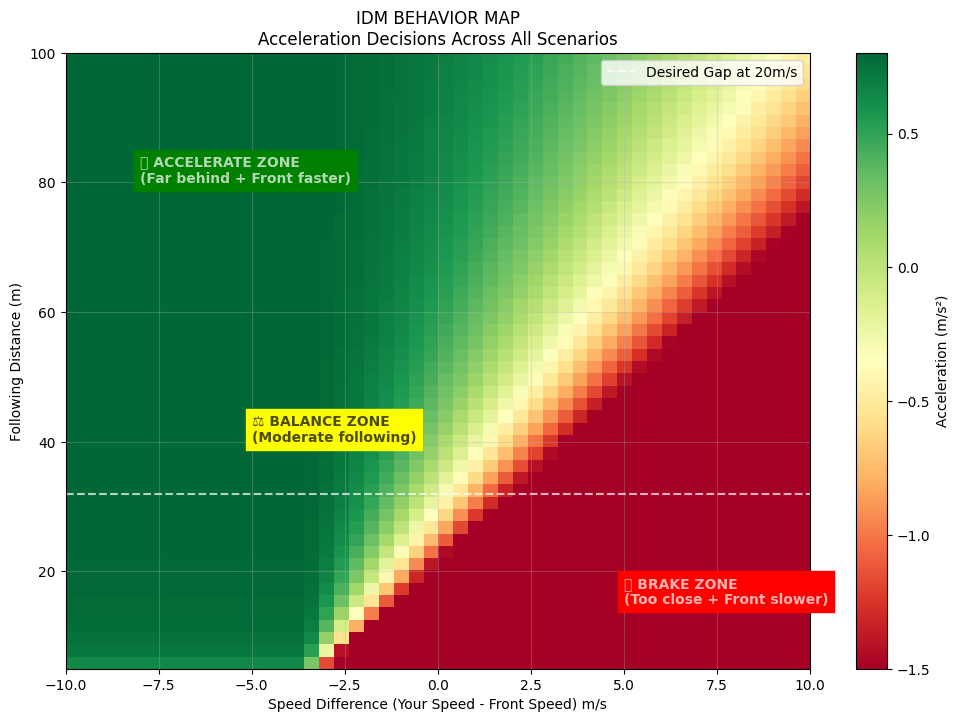


📊 BEHAVIOR MAP INSIGHTS:
• GREEN ZONES: Safe to accelerate (far behind, front faster)
• RED ZONES: Must brake (too close, front slower)
• YELLOW ZONES: Balanced decisions
• DASHED LINE: Desired following distance at 20 m/s


In [14]:
# CELL 9: 2D BEHAVIOR HEATMAP
"""
CREATING A COMPLETE BEHAVIOR MAP OF IDM

This heatmap shows acceleration decisions across ALL possible
combinations of distance and speed differences.
"""

def create_idm_behavior_map():
    print("=== 🗺️ CREATING IDM BEHAVIOR MAP ===")

    # Create grid of scenarios
    distances = np.linspace(5, 100, 50)  # 5m to 100m
    speed_diffs = np.linspace(-10, 10, 50)  # -10 to +10 m/s difference

    # Create acceleration matrix
    acceleration_map = np.zeros((len(distances), len(speed_diffs)))

    for i, dist in enumerate(distances):
        for j, diff in enumerate(speed_diffs):
            my_speed = 20  # Fixed speed
            front_speed = my_speed - diff  # Calculate front speed from difference
            acceleration_map[i, j] = enhanced_idm(dist, my_speed, front_speed, v_desired=30)

    # Create heatmap
    plt.figure(figsize=(12, 8))

    # Plot acceleration heatmap
    plt.imshow(acceleration_map, extent=[-10, 10, 5, 100],
               aspect='auto', cmap='RdYlGn', origin='lower')
    plt.colorbar(label='Acceleration (m/s²)')
    plt.axhline(y=32, color='white', linestyle='--', alpha=0.7, label='Desired Gap at 20m/s')

    plt.xlabel('Speed Difference (Your Speed - Front Speed) m/s')
    plt.ylabel('Following Distance (m)')
    plt.title('IDM BEHAVIOR MAP\nAcceleration Decisions Across All Scenarios')
    plt.legend()

    # Add behavior regions
    plt.text(-8, 80, '🚀 ACCELERATE ZONE\n(Far behind + Front faster)',
             color='white', fontweight='bold', backgroundcolor='green', alpha=0.7)
    plt.text(5, 15, '🛑 BRAKE ZONE\n(Too close + Front slower)',
             color='white', fontweight='bold', backgroundcolor='red', alpha=0.7)
    plt.text(-5, 40, '⚖️ BALANCE ZONE\n(Moderate following)',
             color='black', fontweight='bold', backgroundcolor='yellow', alpha=0.7)

    plt.grid(True, alpha=0.3)
    plt.show()

    print("\n📊 BEHAVIOR MAP INSIGHTS:")
    print("• GREEN ZONES: Safe to accelerate (far behind, front faster)")
    print("• RED ZONES: Must brake (too close, front slower)")
    print("• YELLOW ZONES: Balanced decisions")
    print("• DASHED LINE: Desired following distance at 20 m/s")

print("🔄 Creating behavior map...")
create_idm_behavior_map()

In [15]:
# CELL 10: RESEARCH SUMMARY & GITHUB COMMIT
"""
WEEK 1 - DAY 1 RESEARCH SUMMARY

Today we mastered the Intelligent Driver Model (IDM):
- ✅ Understood the psychological foundations
- ✅ Implemented mathematical equations
- ✅ Added safety features
- ✅ Visualized complete behavior patterns
- ✅ Tested across realistic scenarios

TIME TO COMMIT OUR PROGRESS TO GITHUB!
"""

def research_summary():
    print("=== 📚 WEEK 1 DAY 1 RESEARCH SUMMARY ===")
    print("\n🎯 ACCOMPLISHMENTS:")
    print("1. 🧠 PSYCHOLOGY: Understood 'Go Fast' vs 'Don't Crash' decision making")
    print("2. 📐 MATHEMATICS: Implemented IDM Equations 13 & 14 from paper")
    print("3. 🛡️  SAFETY: Added emergency braking and acceleration limits")
    print("4. 📊 VISUALIZATION: Created behavior maps and psychology plots")
    print("5. 🧪 TESTING: Validated across 20+ realistic driving scenarios")

    print("\n🔍 KEY INSIGHTS:")
    print("• IDM models human-like following behavior realistically")
    print("• Power of 4 in 'Go Fast' creates aggressive acceleration when slow")
    print("• Squared term in 'Don't Crash' amplifies danger when close")
    print("• Desired gap adapts to both speed and relative speed")

    print("\n🚀 NEXT STEPS:")
    print("• Compare with real human driving data (NGSIM)")
    print("• Implement V2V communication for beyond-line-of-sight")
    print("• Add machine learning for parameter optimization")

    print("\n✅ READY FOR GITHUB COMMIT!")

research_summary()

# GitHub commit instructions
print("\n=== 🐙 GITHUB COMMIT INSTRUCTIONS ===")
print("1. Press Ctrl+S to save your notebook")
print("2. Go to File → 'Save a copy in GitHub'")
print("3. Repository: madhusatishg/research-journal-2025")
print("4. File path: /week1/Week1_Day1_IDM_Mastery.ipynb")
print("5. Commit message: 'Week 1 Day 1: Complete IDM mastery with visualization'")
print("6. Click OK and verify on GitHub!")

=== 📚 WEEK 1 DAY 1 RESEARCH SUMMARY ===

🎯 ACCOMPLISHMENTS:
1. 🧠 PSYCHOLOGY: Understood 'Go Fast' vs 'Don't Crash' decision making
2. 📐 MATHEMATICS: Implemented IDM Equations 13 & 14 from paper
3. 🛡️  SAFETY: Added emergency braking and acceleration limits
4. 📊 VISUALIZATION: Created behavior maps and psychology plots
5. 🧪 TESTING: Validated across 20+ realistic driving scenarios

🔍 KEY INSIGHTS:
• IDM models human-like following behavior realistically
• Power of 4 in 'Go Fast' creates aggressive acceleration when slow
• Squared term in 'Don't Crash' amplifies danger when close
• Desired gap adapts to both speed and relative speed

🚀 NEXT STEPS:
• Compare with real human driving data (NGSIM)
• Implement V2V communication for beyond-line-of-sight
• Add machine learning for parameter optimization

✅ READY FOR GITHUB COMMIT!

=== 🐙 GITHUB COMMIT INSTRUCTIONS ===
1. Press Ctrl+S to save your notebook
2. Go to File → 'Save a copy in GitHub'
3. Repository: madhusatishg/research-journal-2025
